-------入力画像---------


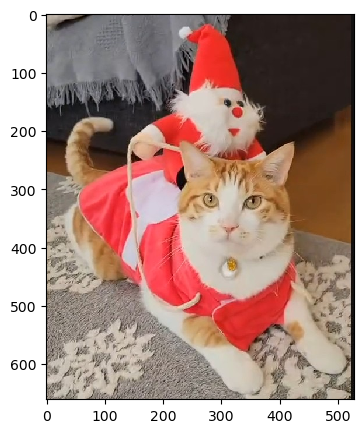

-----------------------
検出した猫の数: 1
------------------1匹目--------------------


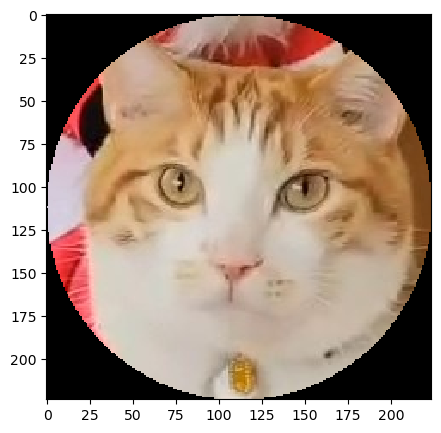

-----------------------------------------------


In [5]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import sys

def is_internal(cx, cy, r, x, y):
    judge = (x-cx)**2 + (y-cy)**2 - r**2
    r = True if judge <= 0 else False
    return r
    
def create_mask(img, x, y, r):
    h, w = img.shape[:2]
    mask = np.zeros((h, w), dtype=bool)
#     print(mask)
    for i in range(y-r, y+r):
        for j in range(x-r, x+r):
            try:
                mask[i][j] = is_internal(x, y, r, j, i)
            except:
                pass
    
    masked_img = img.copy()
    mask = ~mask
    masked_img[mask] = (0, 0, 0)
    
    return masked_img

def move_img(img, x, y):
    matrix = [[1, 0, x],
          [0, 1, y]]
    affine_matrix = np.float32(matrix)
    h, w = img.shape[:2]
    moved_img = cv2.warpAffine(img, affine_matrix, (w, h))
    return moved_img

def trim_img(img, r):
    trimed_img = img[0:2*r, 0:2*r]
    return trimed_img

path = "./data/cat5.jpg".replace("/", os.sep) 
img = cv2.imread(path) # 画像読み込み
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGBに変換

#画像の表示
print("-------入力画像---------")
fig = plt.figure(figsize=(8,5))
ax  = plt.imshow(img)
plt.show()
print("-----------------------")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cascade = cv2.CascadeClassifier("./data/haarcascades/haarcascade_frontalcatface_extended.xml") # カスケード分類機の準備
result_imgs = []
i = 0
cat_face = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(20, 20))
print(f"検出した猫の数: {len(cat_face)}")

for(x, y, w, h) in cat_face:
    x0 = x + w // 2
    y0 = y + h // 2
    r = int((w//2 if w>=h else h//2)*1.5)
    masked_img = create_mask(img, x0, y0, r)
    moved_img = move_img(masked_img, -x0+r, -y0+r)
    trimed_img = trim_img(moved_img, r)
    result_imgs.append(trimed_img)

if(len(result_imgs) >= 1):
    for i, img in enumerate(result_imgs):
        print(f"------------------{i+1}匹目--------------------")
        fig = plt.figure(figsize=(8,5))
        ax  = plt.imshow(img)
        plt.show()
        print(f"-----------------------------------------------")
        
else:
    print("猫が写っていません")